# HINDUNILVR.NS: Hindustan Unilever Limited

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP #2: EXPLORING THE DATASET

In [2]:
df = pd.read_csv('HINDUNILVR.NS.csv', error_bad_lines=False)
df

,Date,Close
0,7/16/2010,266.149994
1,7/19/2010,264.600006
2,7/20/2010,262.649994
3,7/21/2010,261.750000
4,7/22/2010,262.299988
...,...,...
2463,7/9/2020,2175.850098
2464,7/10/2020,2223.800049
2465,7/13/2020,2265.250000
2466,7/14/2020,2234.750000


In [3]:
df.dropna(inplace = True)

In [4]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [5]:
df.index = pd.DatetimeIndex(df['Date'])
df.head()

,Date,Close
Date,,
2010-07-16,7/16/2010,266.149994
2010-07-19,7/19/2010,264.600006
2010-07-20,7/20/2010,262.649994
2010-07-21,7/21/2010,261.750000
2010-07-22,7/22/2010,262.299988


In [6]:
del df['Date']
df.head()

,Close
Date,
2010-07-16,266.149994
2010-07-19,264.600006
2010-07-20,262.649994
2010-07-21,261.750000
2010-07-22,262.299988


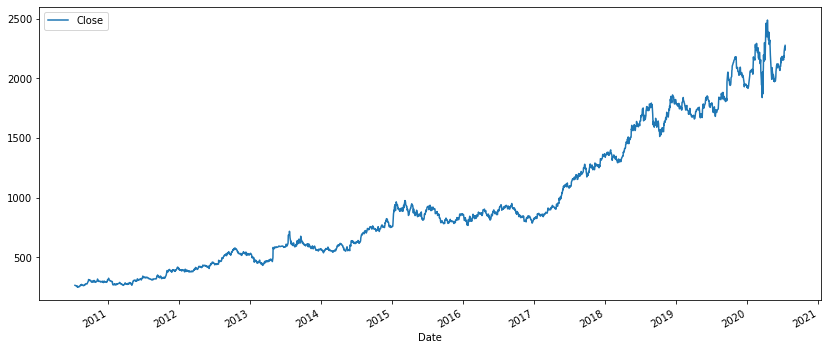

In [7]:
df.plot(figsize = (14,6))     # ORIGNAL DATA

Text(0, 0.5, 'Close')

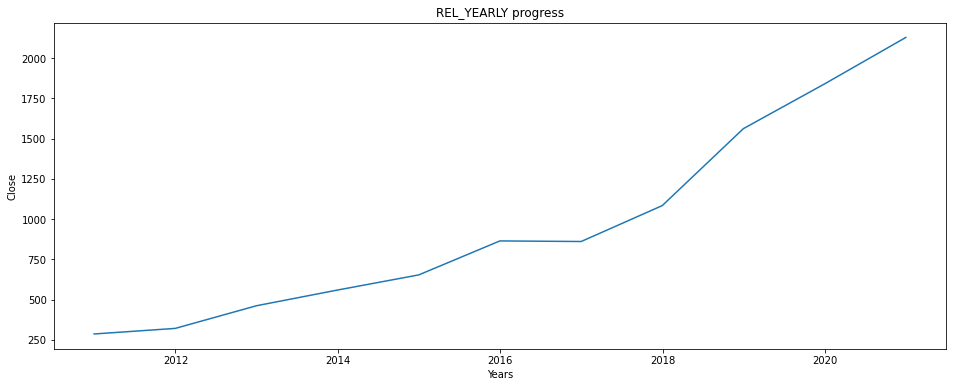

In [8]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
# Yearly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Y').mean())
plt.title('REL_YEARLY progress')
plt.xlabel('Years')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

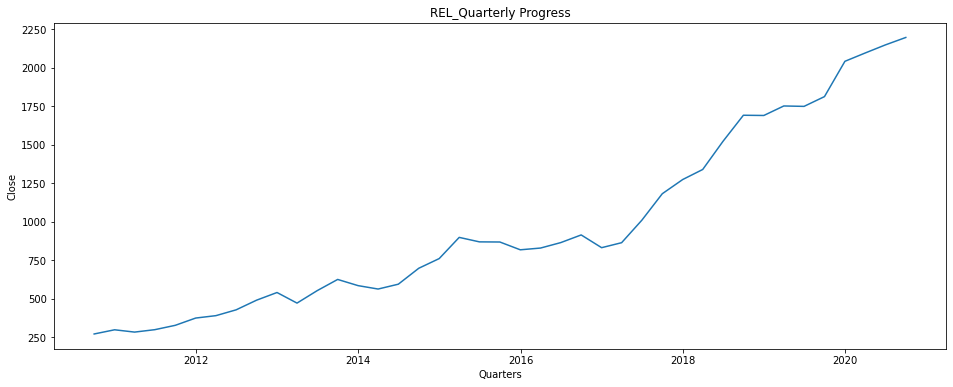

In [9]:
# Quaterly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Q').mean())
plt.title('REL_Quarterly Progress')
plt.xlabel('Quarters')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

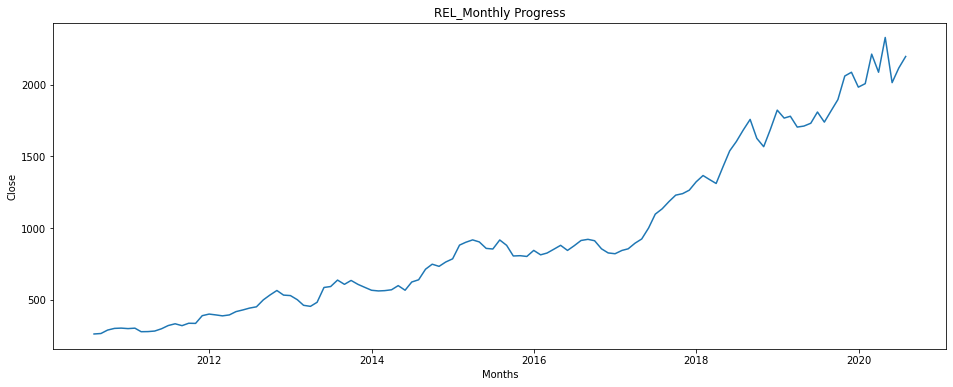

In [10]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(df.resample('M').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

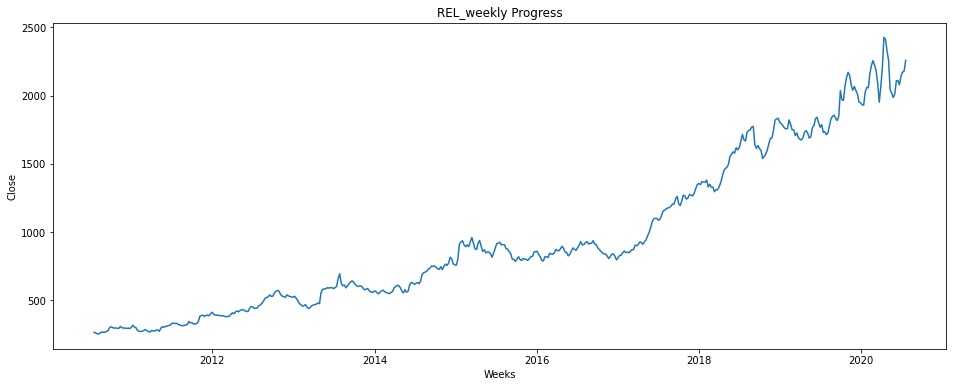

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('W').mean())
plt.title('REL_weekly Progress')
plt.xlabel('Weeks')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

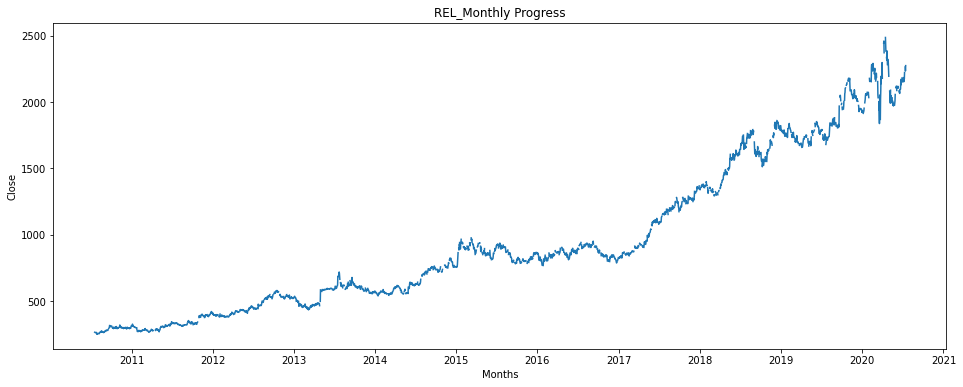

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('D').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

# STEP #3: PREPARING THE DATA¶

In [13]:
df

,Close
Date,
2010-07-16,266.149994
2010-07-19,264.600006
2010-07-20,262.649994
2010-07-21,261.750000
2010-07-22,262.299988
...,...
2020-07-09,2175.850098
2020-07-10,2223.800049
2020-07-13,2265.250000


In [14]:
df_Prophet = df.resample('D').mean().reset_index()

df_Prophet.index = pd.DatetimeIndex(df_Prophet['Date'])

df_Prophet

,Date,Close
Date,,
2010-07-16,2010-07-16,266.149994
2010-07-17,2010-07-17,NaN
2010-07-18,2010-07-18,NaN
2010-07-19,2010-07-19,264.600006
2010-07-20,2010-07-20,262.649994
...,...,...
2020-07-11,2020-07-11,NaN
2020-07-12,2020-07-12,NaN
2020-07-13,2020-07-13,2265.250000


In [15]:
df_Prophet.isna().sum()

Date        0
Close    1192
dtype: int64

In [16]:
df_rolling_W2 = df.rolling(window=1).mean().reset_index()
df_rolling_W2

,Date,Close
0,2010-07-16,266.149994
1,2010-07-19,264.600006
2,2010-07-20,262.649994
3,2010-07-21,261.750000
4,2010-07-22,262.299988
...,...,...
2456,2020-07-09,2175.850098
2457,2020-07-10,2223.800049
2458,2020-07-13,2265.250000
2459,2020-07-14,2234.750000


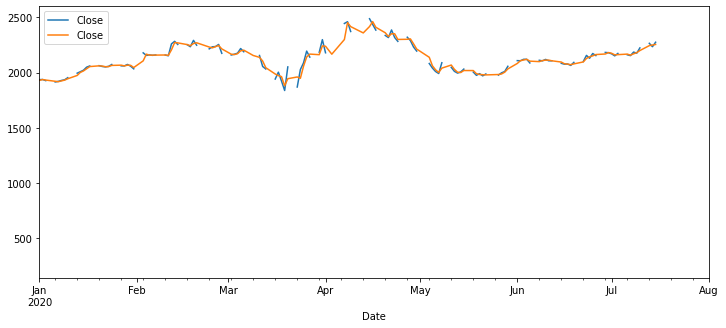

In [17]:
df_Prophet['Close'].plot(figsize=(12,5),legend = True)   # TRUE DATA
df.rolling(window=2).mean()['Close'].plot(legend = True,xlim = ['2020-01-01','2020-08-01']); # ROLLING MEAN

In [18]:
#preparing data
df = df_rolling_W2.rename(columns={'Date':'ds', 'Close':'y'})

df

,ds,y
0,2010-07-16,266.149994
1,2010-07-19,264.600006
2,2010-07-20,262.649994
3,2010-07-21,261.750000
4,2010-07-22,262.299988
...,...,...
2456,2020-07-09,2175.850098
2457,2020-07-10,2223.800049
2458,2020-07-13,2265.250000
2459,2020-07-14,2234.750000


# STEP #4: MODEL

In [19]:
m = Prophet()
m.fit(df)


future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2463,2020-07-18,2190.972803,2143.219193,2286.269776,2190.972803,2190.972803,19.829544,19.829544,19.829544,4.384672,4.384672,4.384672,15.444872,15.444872,15.444872,0.0,0.0,0.0,2210.802347
2464,2020-07-19,2191.794820,2138.077721,2287.748354,2191.794820,2191.794820,19.519015,19.519015,19.519015,4.384668,4.384668,4.384668,15.134347,15.134347,15.134347,0.0,0.0,0.0,2211.313836
2465,2020-07-20,2192.616838,2129.496807,2279.441969,2192.616838,2192.616838,11.513545,11.513545,11.513545,-3.283086,-3.283086,-3.283086,14.796632,14.796632,14.796632,0.0,0.0,0.0,2204.130383
2466,2020-07-21,2193.438855,2131.526527,2280.713527,2193.438855,2193.438855,11.335489,11.335489,11.335489,-3.119149,-3.119149,-3.119149,14.454638,14.454638,14.454638,0.0,0.0,0.0,2204.774345
2467,2020-07-22,2194.260873,2134.465955,2283.212799,2194.260873,2194.260873,13.578764,13.578764,13.578764,-0.552454,-0.552454,-0.552454,14.131218,14.131218,14.131218,0.0,0.0,0.0,2207.839636


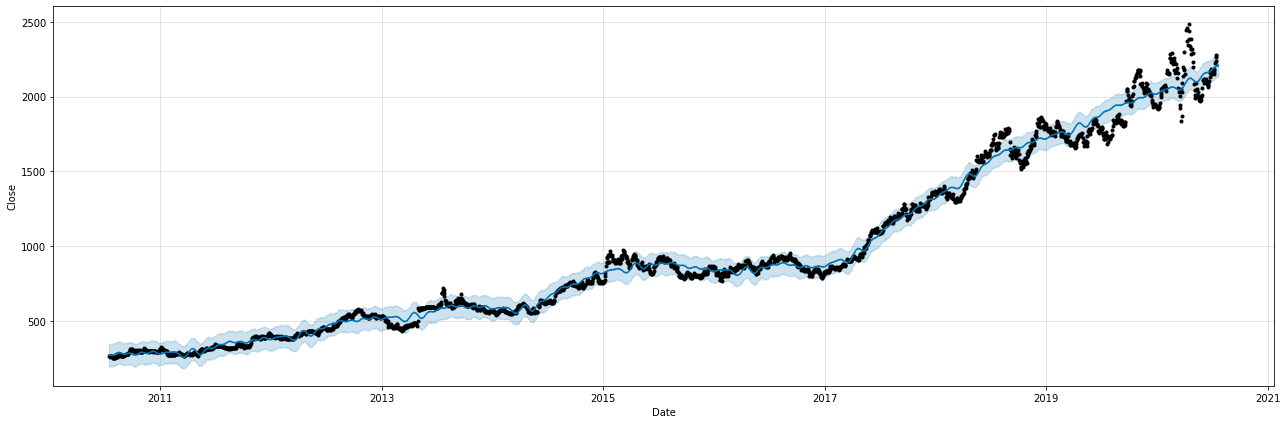

In [21]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close', figsize=(18,6))

# BLACK DOT REPRESENTS THE ORIGNAL DATA
# BLACK DOT REPRESENTS THE PREDICTED DATA / TREND

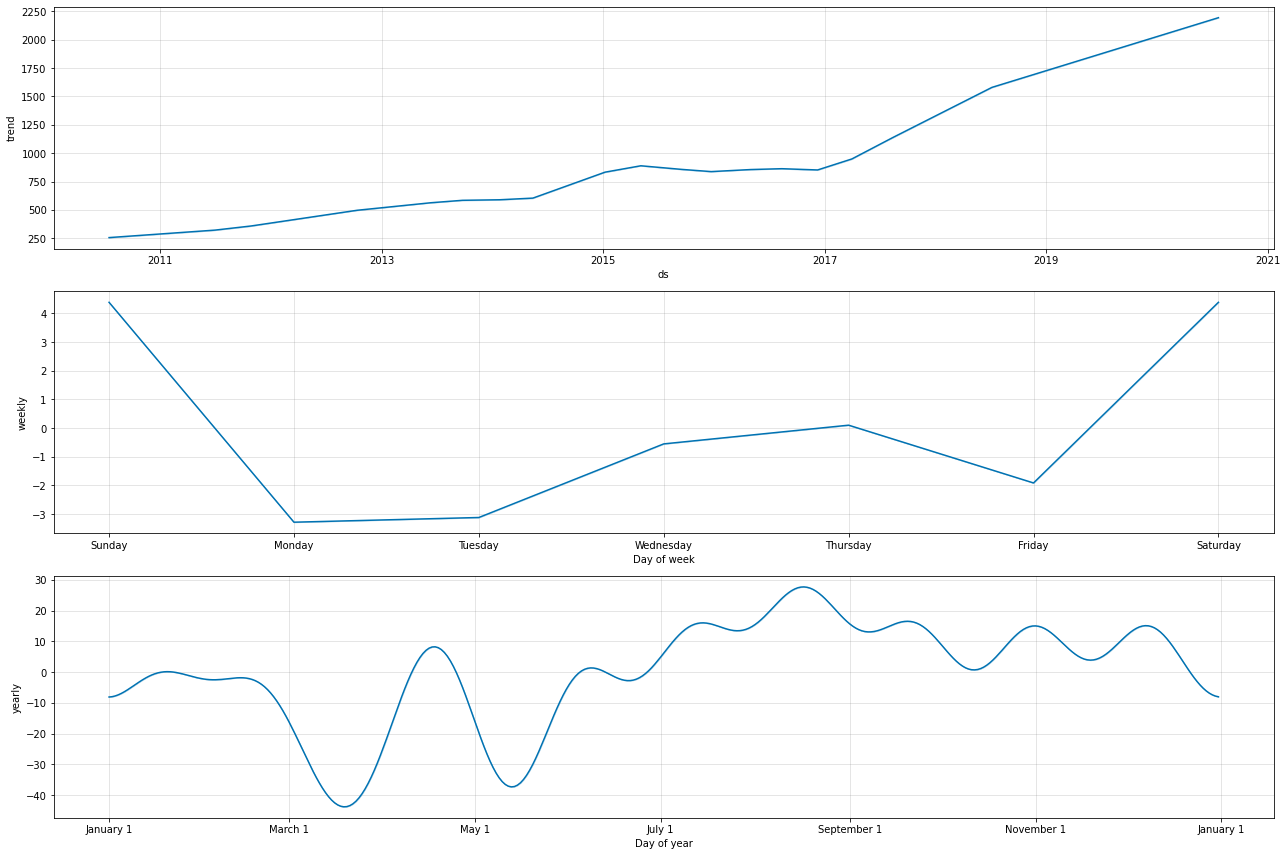

In [22]:
figure2 = m.plot_components(forecast, figsize=(18,12))

In [23]:
forc = forecast[['ds','yhat']]
forc = forc.rename(columns={'ds':'Date', 'yhat':'forecast_Close'})
forc.tail(12)

,Date,forecast_Close
2456,2020-07-09,2197.703358
2457,2020-07-10,2197.176516
2458,2020-07-13,2199.447478
2459,2020-07-14,2200.558086
2460,2020-07-15,2203.951835
2461,2020-07-16,2205.325078
2462,2020-07-17,2203.942236
2463,2020-07-18,2210.802347
2464,2020-07-19,2211.313836
2465,2020-07-20,2204.130383


**FINAL FORECAST**